## Execise 1

In this exercise, do the following:
1. Load the dataset used in the time series example - Energy consumption data. You can find it in the notebook "TSA_Example" in Time Series folder in Moodle.
2. Setup a nested MLFlow loop where different modelling experiments can be tracked and the use the dataset in point 1 to experiment and track models. You should do following combinations:
    1. At least 3 model types
    2. At least 3 different feature combinations
    3. At least 3 different options for 3 different hyperparameters
    4. At least 3 different time splits for train test
3. For each option in the combination, you should calculate & log the following in MLFlow:
    1. RMSE
    2. MAE
    3. Plot of actual vs predicted for 1 month data
    4. Plot of actual vs predicted for 1 week of data
    5. All of the combination info in point 2, such as which model, what feature combindation, what hyperparameter, what train test split has been used
4. Turn on MLFlow UI and track your experiments

In [2]:
import os
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import mlflow
import mlflow.sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import IPython.display as display
import tempfile
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [3]:
path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\robikscube\hourly-energy-consumption\versions\3


In [4]:
dataset_path = r"C:\Users\Bruger\.cache\kagglehub\datasets\robikscube\hourly-energy-consumption\versions\3"

files = os.listdir(dataset_path)
print(files)


['AEP_hourly.csv', 'COMED_hourly.csv', 'DAYTON_hourly.csv', 'DEOK_hourly.csv', 'DOM_hourly.csv', 'DUQ_hourly.csv', 'EKPC_hourly.csv', 'est_hourly.paruqet', 'FE_hourly.csv', 'NI_hourly.csv', 'PJME_hourly.csv', 'PJMW_hourly.csv', 'pjm_hourly_est.csv', 'PJM_Load_hourly.csv']


In [5]:
file_path = r"C:\Users\Bruger\.cache\kagglehub\datasets\robikscube\hourly-energy-consumption\versions\3\PJME_hourly.csv"

In [6]:
df = pd.read_csv(file_path)
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0
...,...
2018-08-02 20:00:00,44057.0
2018-08-02 21:00:00,43256.0
2018-08-02 22:00:00,41552.0


In [7]:
df.loc["2018-01-01"]

,PJME_MW
Datetime,
2018-01-01 00:00:00,39928.0
2018-01-01 01:00:00,38925.0
2018-01-01 02:00:00,38298.0
2018-01-01 03:00:00,37808.0
2018-01-01 04:00:00,37742.0
2018-01-01 05:00:00,38049.0
2018-01-01 06:00:00,38821.0
2018-01-01 07:00:00,39762.0
2018-01-01 08:00:00,40154.0


In [8]:
df_s = pd.DataFrame(df.loc["2018-01"])
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2018-01-01 00:00:00 to 2018-01-31 23:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PJME_MW  744 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [9]:
    df = df.copy()

    # Basic time-based features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    # Basic time-based features
    df_s['hour'] = df_s.index.hour
    df_s['dayofweek'] = df_s.index.dayofweek
    df_s['quarter'] = df_s.index.quarter
    df_s['month'] = df_s.index.month
    df_s['year'] = df_s.index.year
    df_s['dayofyear'] = df_s.index.dayofyear
    df_s['dayofmonth'] = df_s.index.day
    df_s['weekofyear'] = df_s.index.isocalendar().week

#df_s

In [10]:
feature_combinations = [df_s[["hour","quarter"]],
                        df_s[["month","year"]],
                        df_s
                       ]

In [11]:
feature_combinations[0]

,hour,quarter
Datetime,,
2018-01-01 00:00:00,0,1
2018-01-01 01:00:00,1,1
2018-01-01 02:00:00,2,1
2018-01-01 03:00:00,3,1
2018-01-01 04:00:00,4,1
...,...,...
2018-01-31 19:00:00,19,1
2018-01-31 20:00:00,20,1
2018-01-31 21:00:00,21,1


In [12]:
y = df_s["PJME_MW"]
df_s = df_s.drop("PJME_MW",axis=1)
df_s

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
2018-01-01 00:00:00,0,0,1,1,2018,1,1,1
2018-01-01 01:00:00,1,0,1,1,2018,1,1,1
2018-01-01 02:00:00,2,0,1,1,2018,1,1,1
2018-01-01 03:00:00,3,0,1,1,2018,1,1,1
2018-01-01 04:00:00,4,0,1,1,2018,1,1,1
...,...,...,...,...,...,...,...,...
2018-01-31 19:00:00,19,2,1,1,2018,31,31,5
2018-01-31 20:00:00,20,2,1,1,2018,31,31,5
2018-01-31 21:00:00,21,2,1,1,2018,31,31,5


In [13]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2018-01-01 00:00:00 to 2018-01-31 23:00:00
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hour        744 non-null    int32 
 1   dayofweek   744 non-null    int32 
 2   quarter     744 non-null    int32 
 3   month       744 non-null    int32 
 4   year        744 non-null    int32 
 5   dayofyear   744 non-null    int32 
 6   dayofmonth  744 non-null    int32 
 7   weekofyear  744 non-null    UInt32
dtypes: UInt32(1), int32(7)
memory usage: 29.8 KB


In [14]:
df_s

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
2018-01-01 00:00:00,0,0,1,1,2018,1,1,1
2018-01-01 01:00:00,1,0,1,1,2018,1,1,1
2018-01-01 02:00:00,2,0,1,1,2018,1,1,1
2018-01-01 03:00:00,3,0,1,1,2018,1,1,1
2018-01-01 04:00:00,4,0,1,1,2018,1,1,1
...,...,...,...,...,...,...,...,...
2018-01-31 19:00:00,19,2,1,1,2018,31,31,5
2018-01-31 20:00:00,20,2,1,1,2018,31,31,5
2018-01-31 21:00:00,21,2,1,1,2018,31,31,5


In [15]:
t_sizes = [0.2,0.25,0.3]

(744, 2) (744,)


2025/03/11 19:46:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:46:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:46:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:46:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:52 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 2) (744,)


2025/03/11 19:47:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
C:\Users\Bruger\AppData\Local\Temp\ipykernel_24156\1036620504.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 4))


(744, 9) (744,)


2025/03/11 19:48:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


(744, 9) (744,)


2025/03/11 19:48:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Summary of Experiment Results:
                                             features              model  \
0                        hour  quarter
Datetime   ...       RandomForest   
1                        hour  quarter
Datetime   ...   LinearRegression   
2                        hour  quarter
Datetime   ...  KNearestNeighbors   
3                        hour  quarter
Datetime   ...       RandomForest   
4                        hour  quarter
Datetime   ...   LinearRegression   
5                        hour  quarter
Datetime   ...  KNearestNeighbors   
6                        hour  quarter
Datetime   ...       RandomForest   
7                        hour  quarter
Datetime   ...   LinearRegression   
8                        hour  quarter
Datetime   ...  KNearestNeighbors   
9                        month  year
Datetime     ...       RandomForest   
10                       month  year
Datetime     ...   LinearRegression   
11                       month  year
Datetime     ...  K

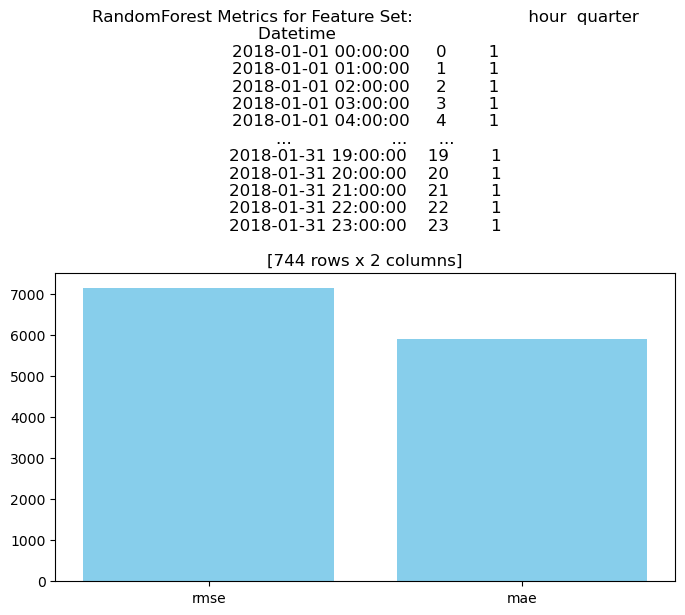

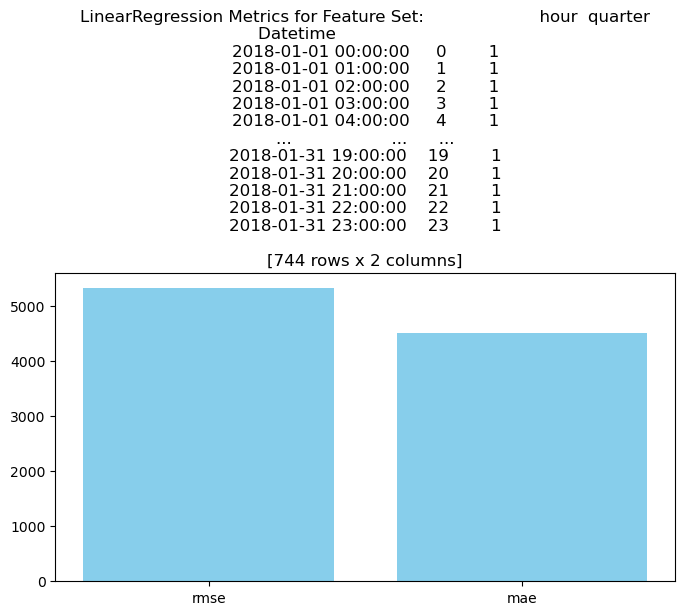

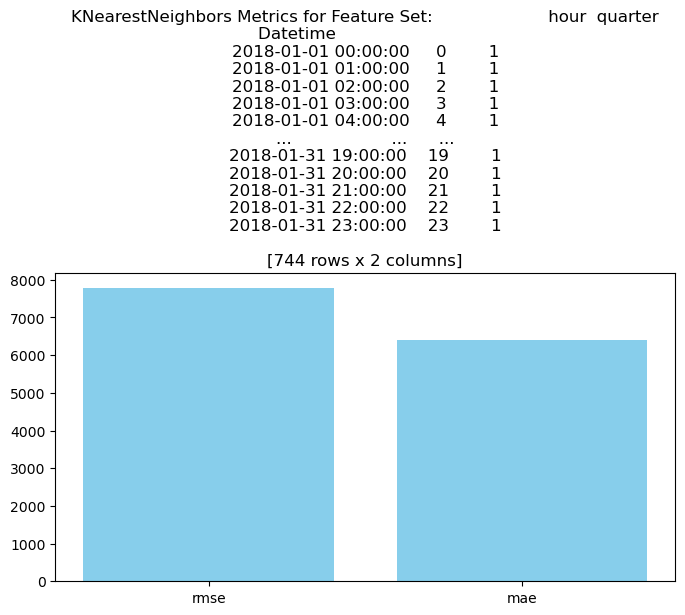

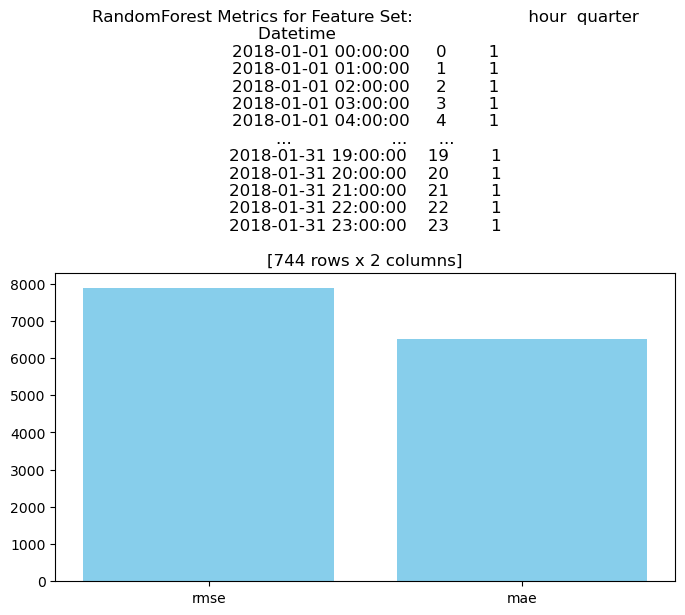

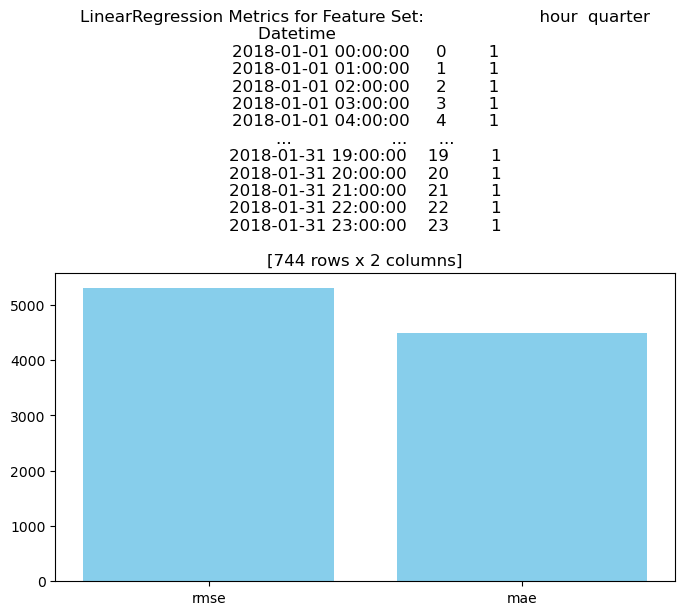

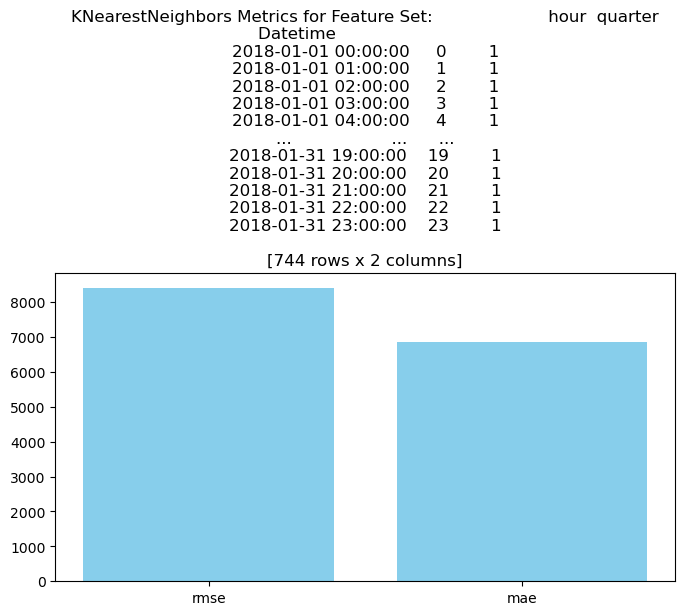

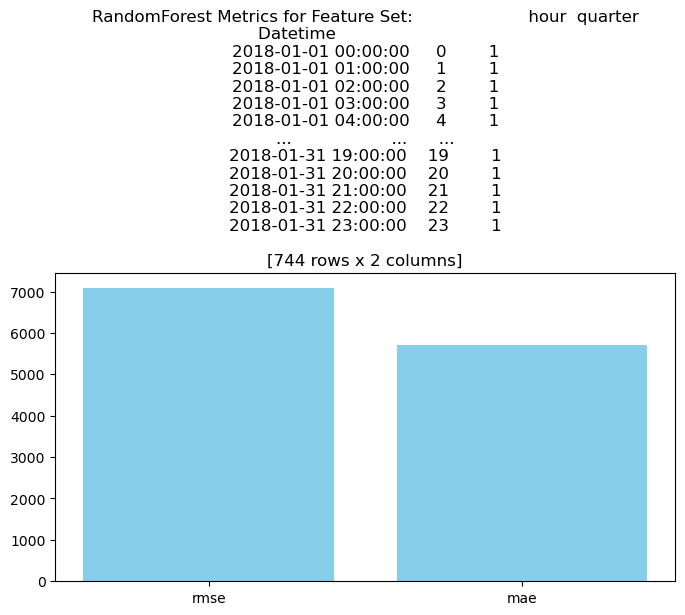

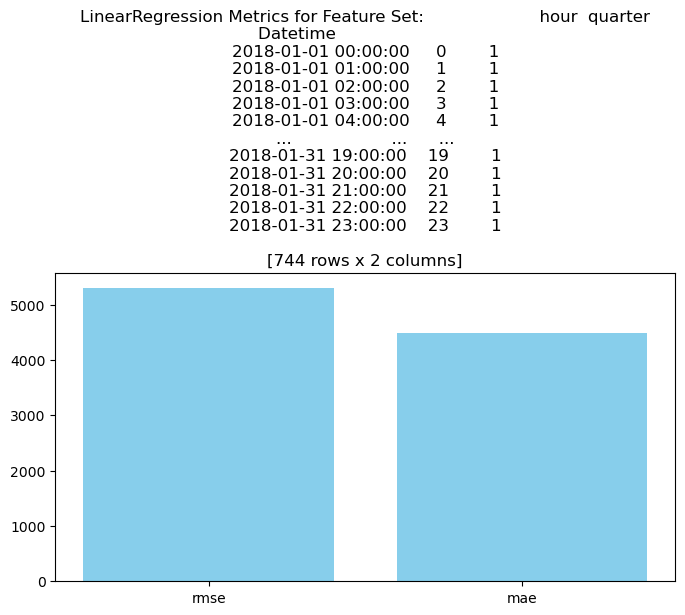

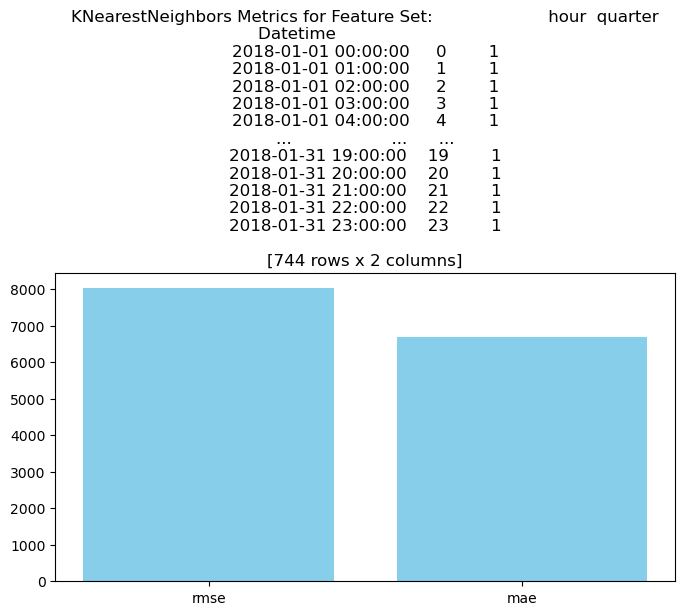

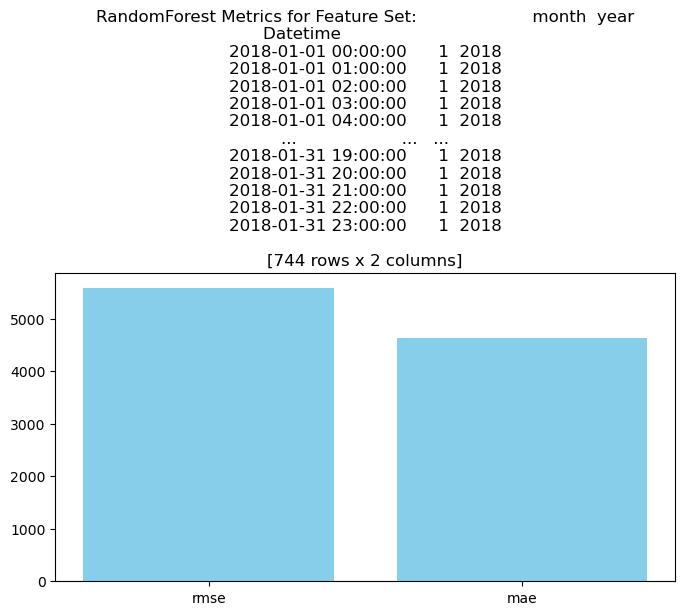

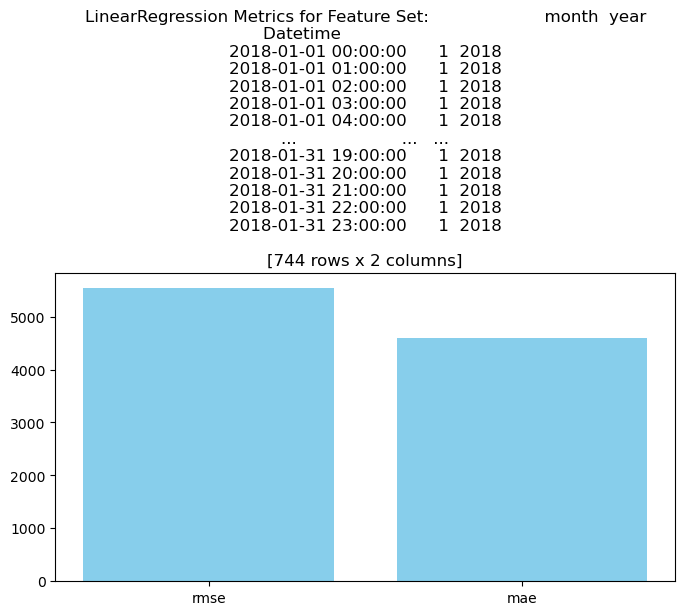

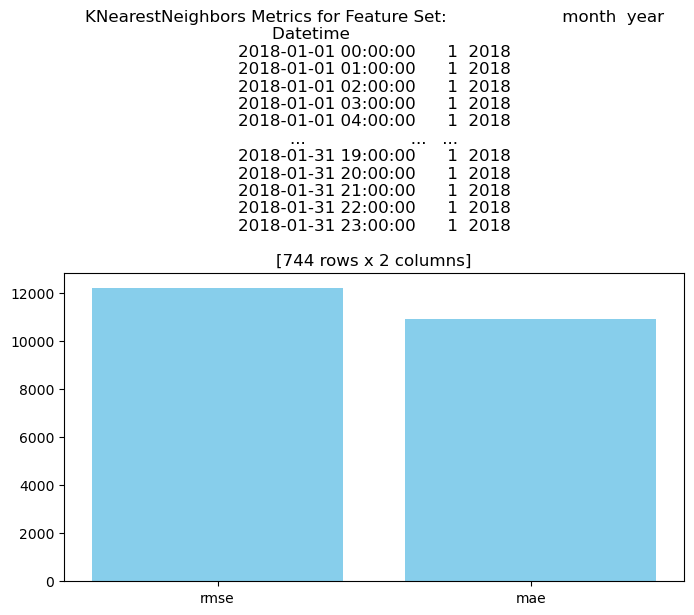

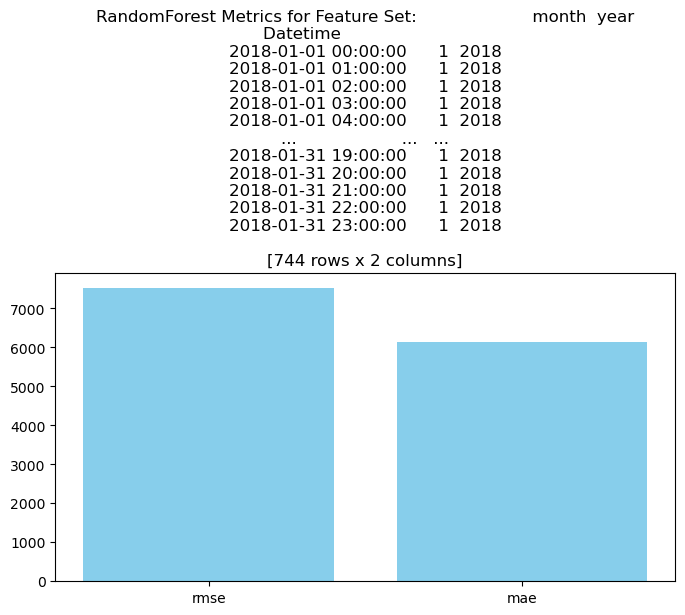

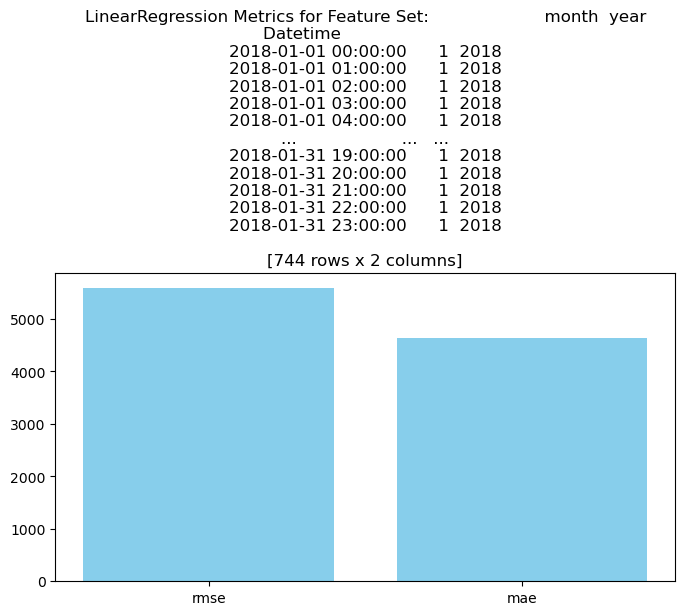

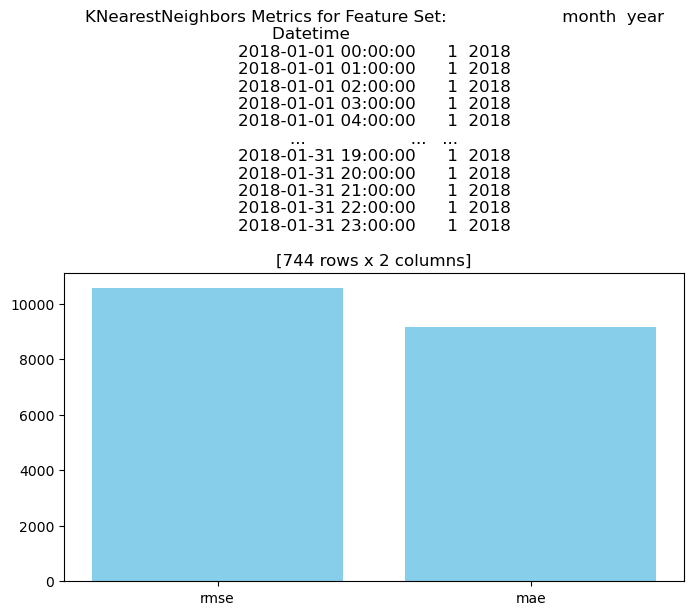

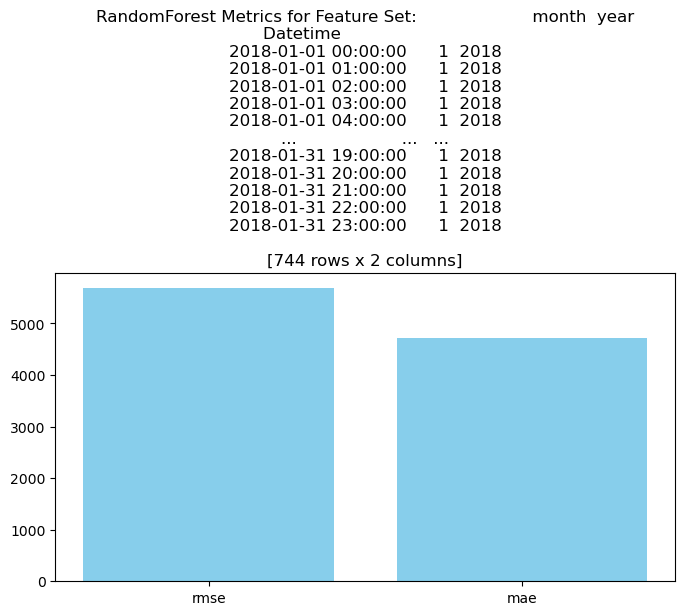

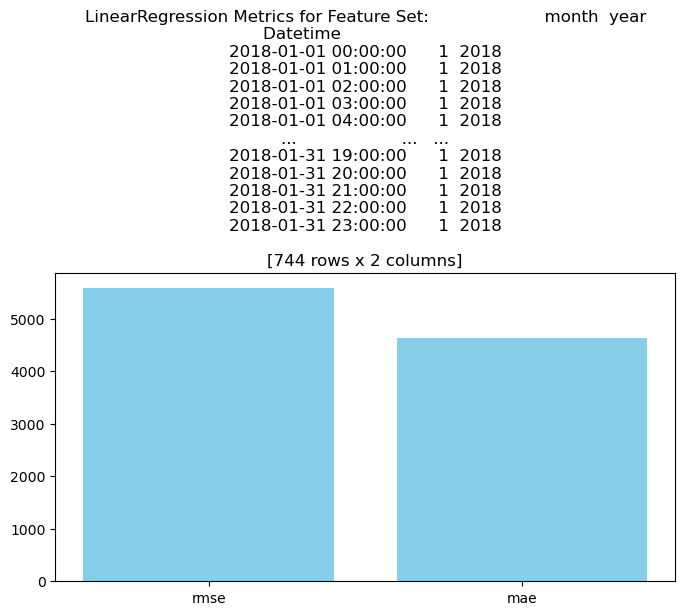

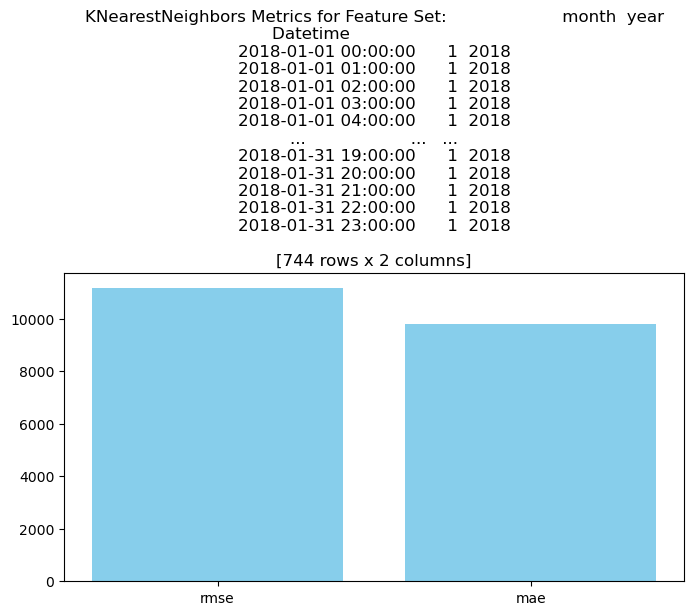

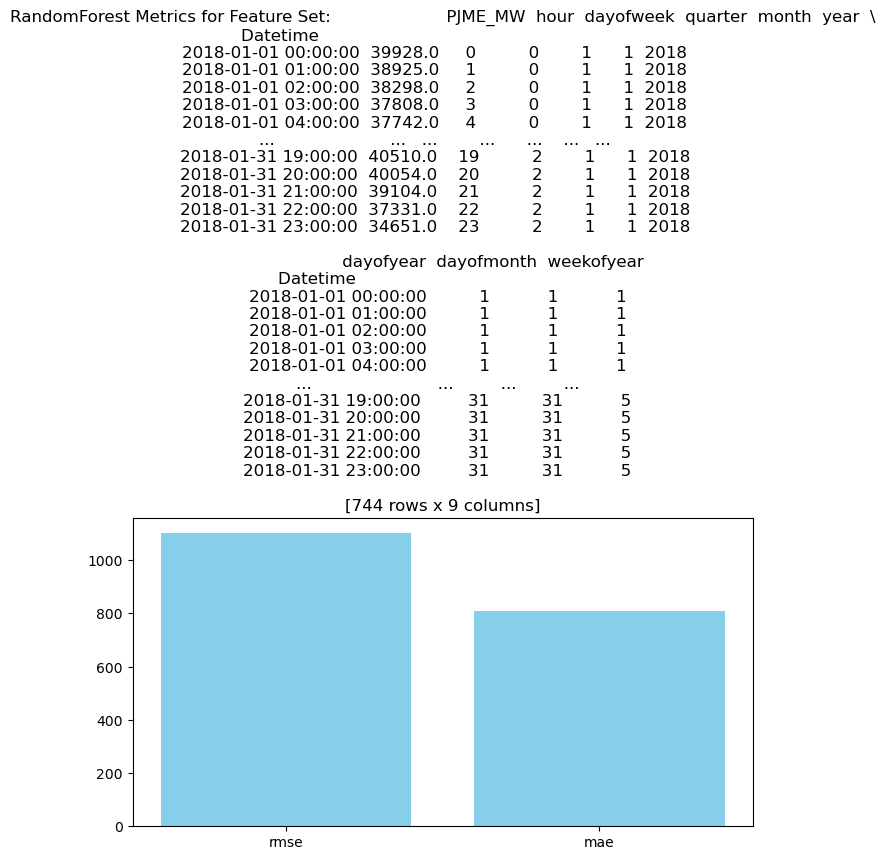

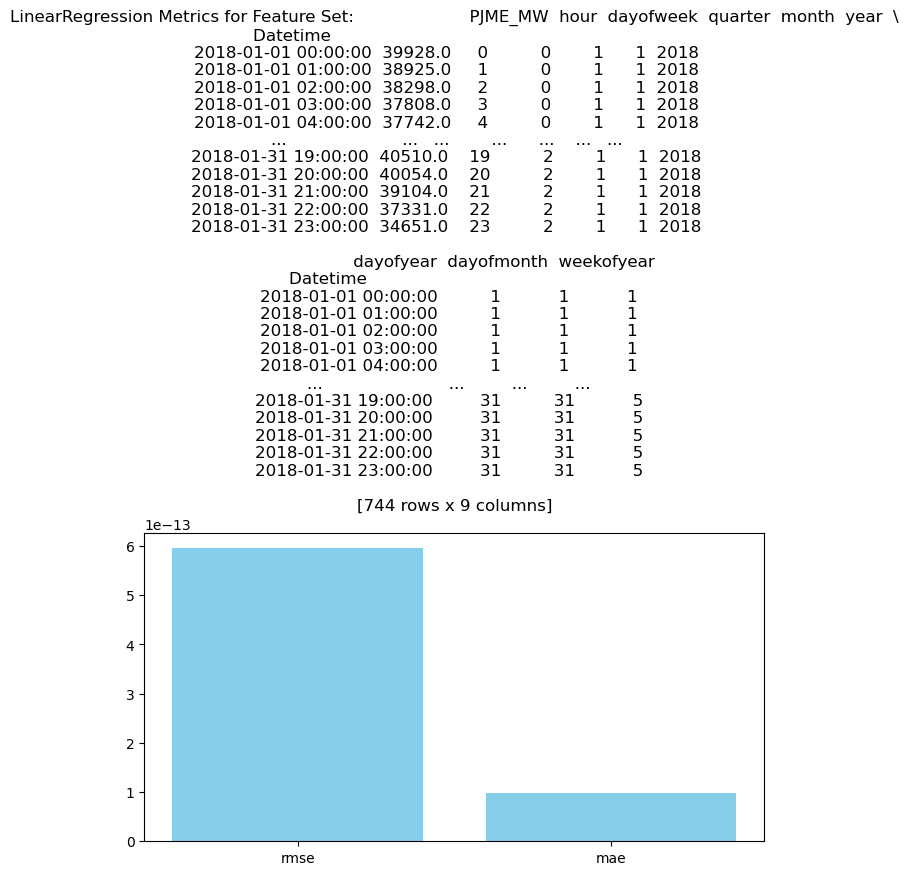

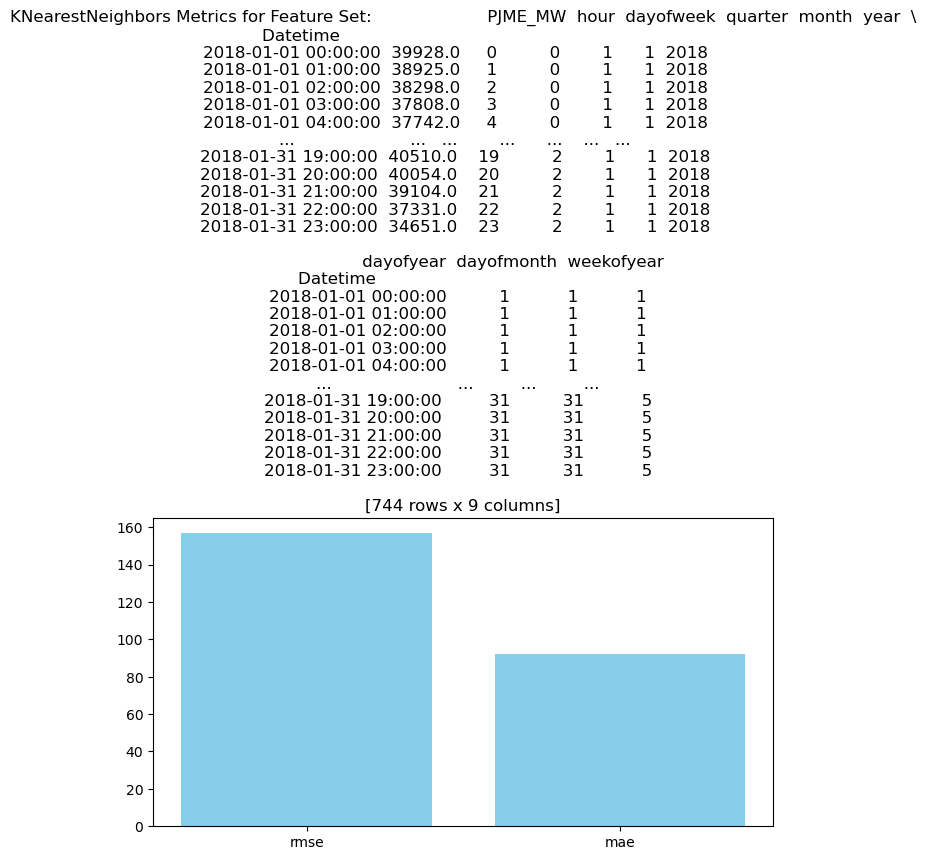

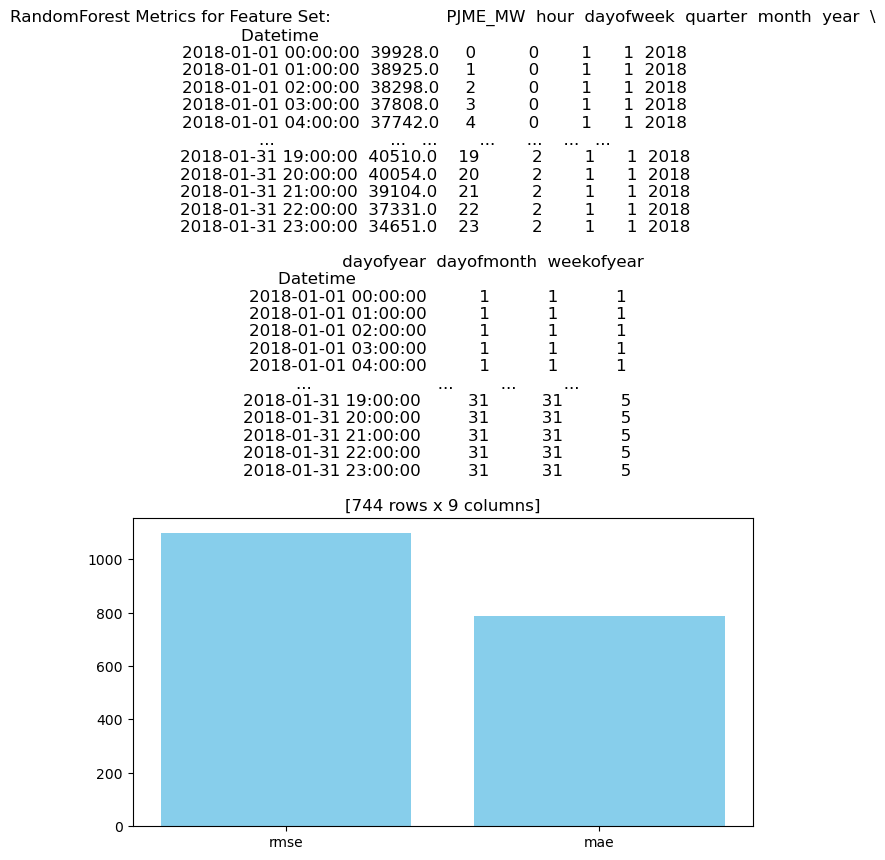

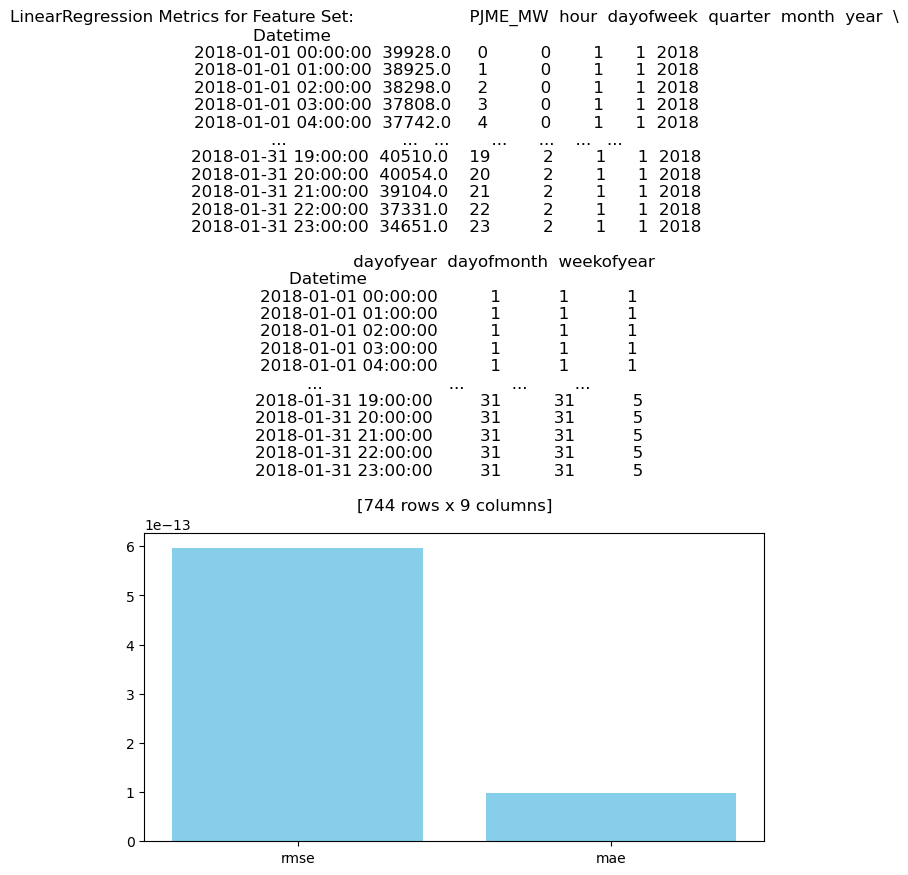

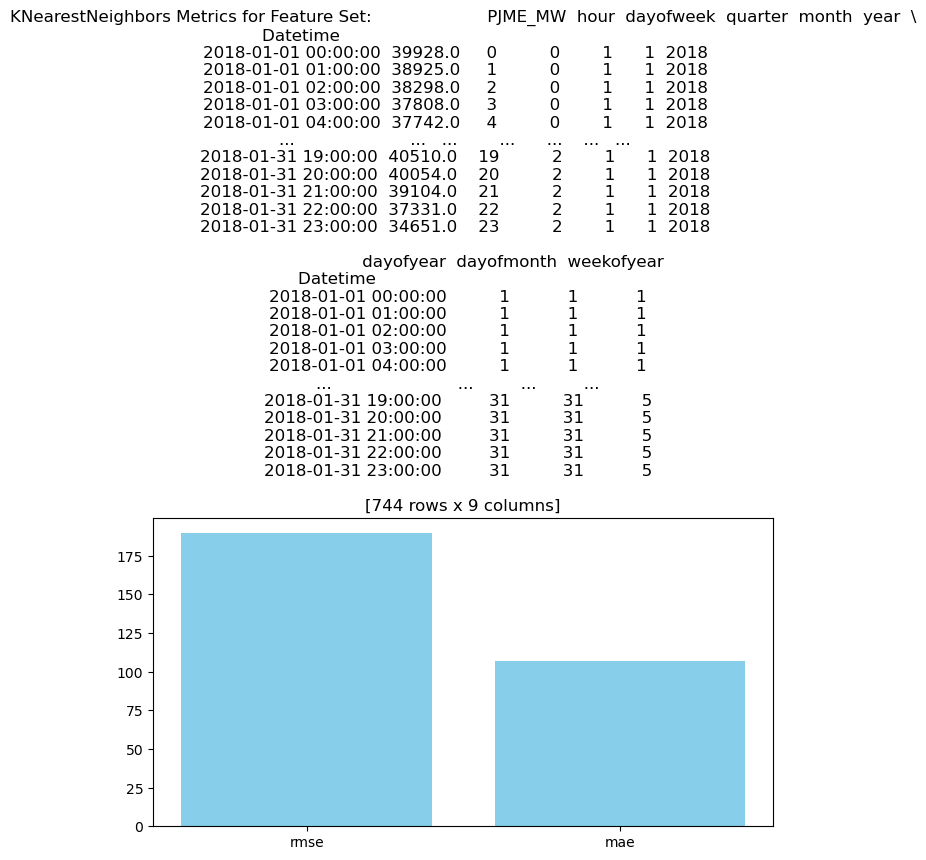

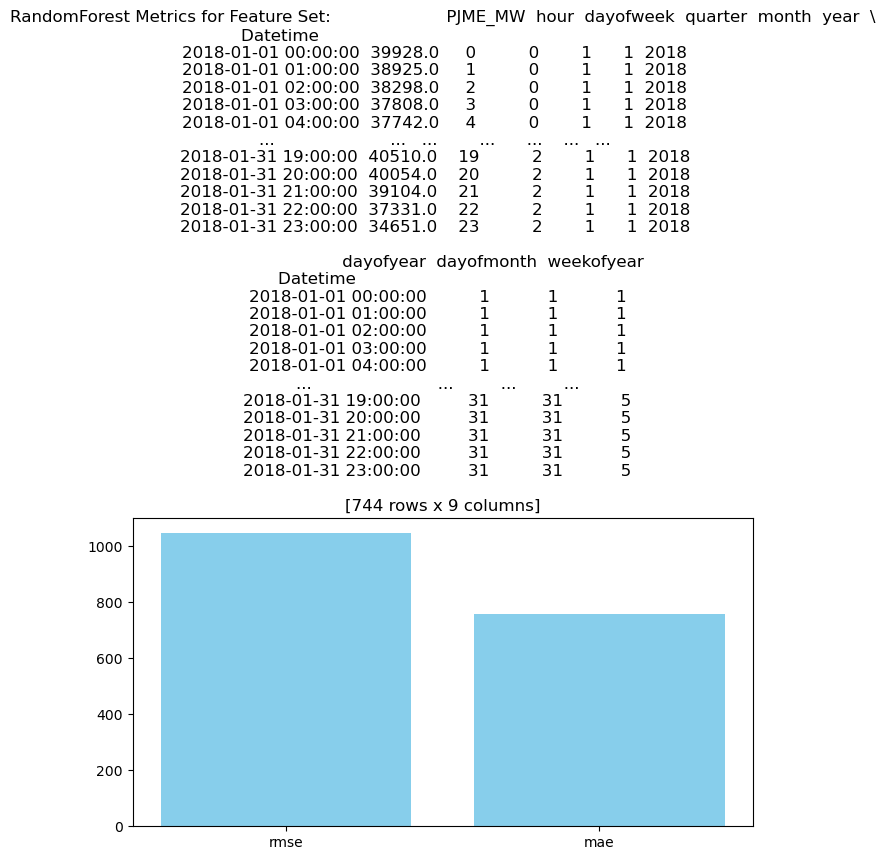

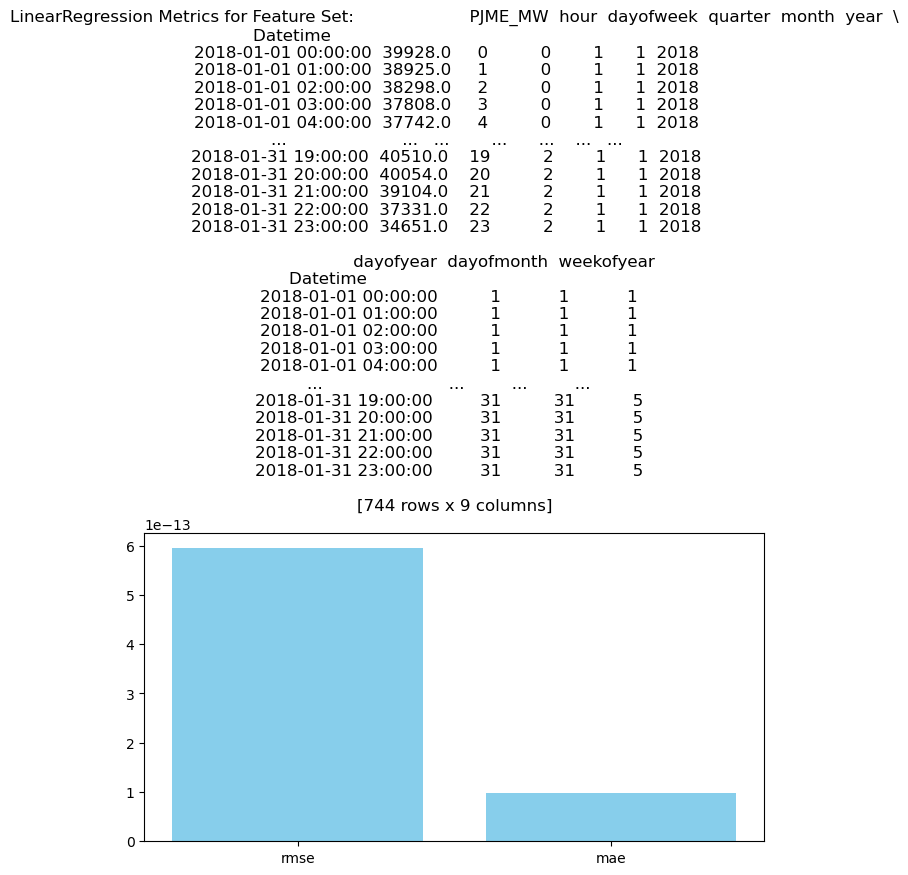

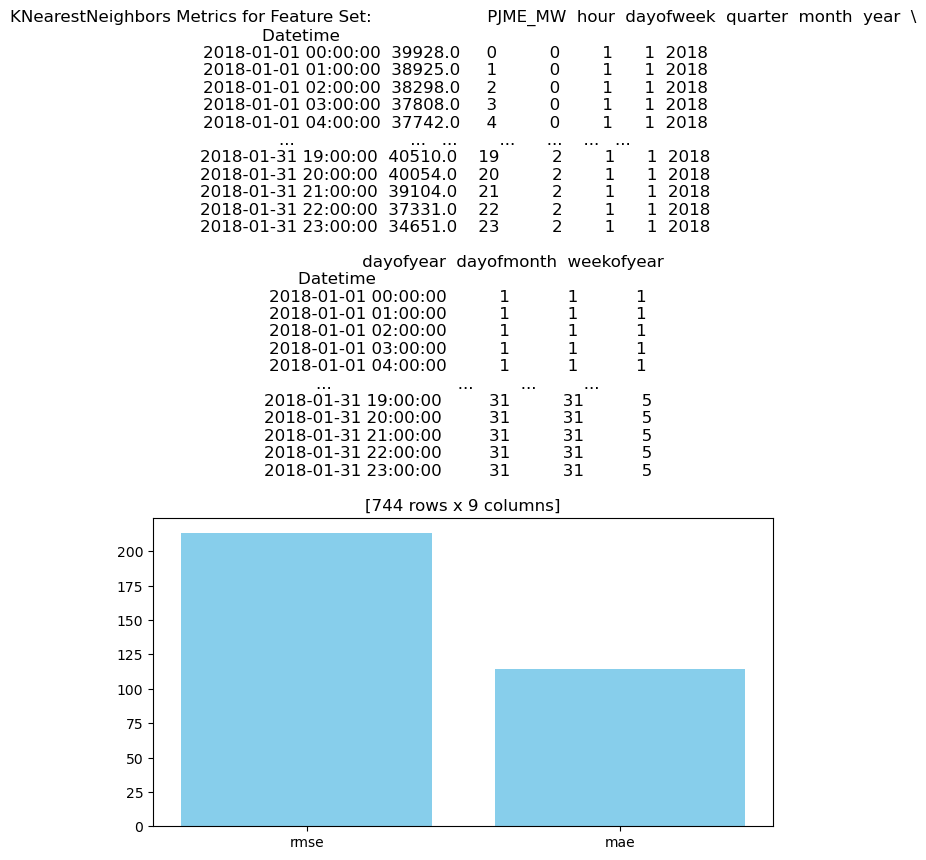

In [16]:

# Start MLFlow experiment
mlflow.set_experiment("MLFlow Experiment Tracking Example")

results = []

# Train models with different feature combinations
for features in feature_combinations:
    for size in t_sizes:
        for model_name, model in zip(["RandomForest", "LinearRegression","KNearestNeighbors"], 
                                     [RandomForestClassifier(random_state=42), LinearRegression(),KNeighborsClassifier(n_neighbors=5)]):
            with mlflow.start_run():
                # Log feature combination and model type
                mlflow.log_param("features", features)
                mlflow.log_param("model_type", model_name)
                
                # Train the model
                X = features
                print(X.shape, y.shape)
                X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=size, random_state=12)
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
                
                # Calculate metrics
                rmse = root_mean_squared_error(y_test, predictions)
                mae = mean_absolute_error(y_test, predictions)
                
                # Log metrics
                mlflow.log_metric("rmse", rmse)
                mlflow.log_metric("mae", mae)
              
            
                # Create and log a plot of the metrics
                fig, ax = plt.subplots(figsize=(8, 4))
                metrics = [rmse,mae]
                metric_names = ["rmse", "mae"]
                ax.bar(metric_names, metrics, color='skyblue')
                ax.set_title(f"{model_name} Metrics for Feature Set: {features}")
                #ax.set_ylim(0, 8)
                
                # Save the plot to a temporary file and log it as an artifact
                temp_file = tempfile.NamedTemporaryFile(suffix=".png", delete=False)
                plt.savefig(temp_file.name)
                mlflow.log_artifact(temp_file.name, artifact_path="plots")
                temp_file.close()
                
                # Log the model
                mlflow.sklearn.log_model(model, model_name)
                
                # Store results for summary
                results.append({
                    "features": features,
                    "model": model_name,
                    "rmse" : rmse,
                    "mae" : mae
                })

# Print summary of results
results_df = pd.DataFrame(results)
print("\nSummary of Experiment Results:")
print(results_df)